In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [19]:
data = pd.read_csv('rodents_total.csv', index_col= 0)

In [20]:
data

,Camera,Species,Year,Month,Day,Hour,Minute,Second,# of Individuals
1,2NF,Chaetodipus_hispidus,2021,2,6,4,17,1,1
25,2NF,Chaetodipus_hispidus,2021,2,6,5,9,1,1
104,2NF,Chaetodipus_hispidus,2021,2,7,4,11,1,1
113,2NF,Chaetodipus_hispidus,2021,2,8,1,9,10,1
116,2NF,Chaetodipus_hispidus,2021,2,8,1,51,51,1
...,...,...,...,...,...,...,...,...,...
12448,WG07,Peromyscus_leucopus,2021,2,24,0,22,27,1
12451,WG14,human,2021,2,12,11,13,48,1
12454,WG17,human,2021,2,19,16,6,1,1
12460,WG17,human,2021,2,26,16,32,11,1


In [21]:
rodents = data[data['Species'].isin(['Chaetodipus_hispidus','Sigmodon_hispidus','Peromyscus_leucopus','Onychomys_leucogaster', 'Rattus_rattus', 'Neotoma_micropus','Reithrodontomys_fulvous'])] #filter for rodents, update with any new species

In [25]:
rodents_time = rodents.groupby(['Hour','Species'])['# of Individuals'].sum() #select relevant data for figure

Hour  Species             
0     Chaetodipus_hispidus     3
      Neotoma_micropus        11
      Peromyscus_leucopus     14
      Rattus_rattus            1
      Sigmodon_hispidus        6
                              ..
22    Sigmodon_hispidus        3
23    Chaetodipus_hispidus     3
      Neotoma_micropus         3
      Peromyscus_leucopus     14
      Sigmodon_hispidus        4
Name: # of Individuals, Length: 63, dtype: int64

Text(0, -55, 'Fig 1: Sample plot of rodent diel activity at all site categories')

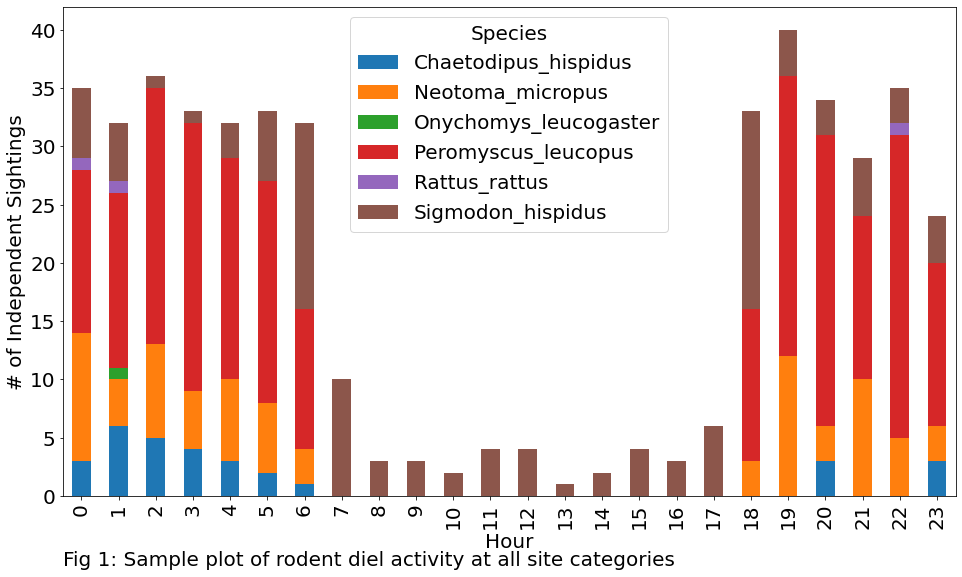

In [126]:
plt.rcParams.update({'font.size': 20})
rodents_time.unstack().plot.bar(ylabel='# of Independent Sightings', stacked=True, figsize=(16,9))
plt.annotate('Fig 1: Sample plot of rodent diel activity at all site categories', (0,0), (0, -55), xycoords='axes fraction', textcoords='offset points', va='top')

In [121]:
crossings=rodents[rodents['Camera'].isin(['2NN','2NF','2SF','2SN','3ANN','3ANF','3ASN','3ASF','4NN', '4NF', '4SN', '4SF'])]

In [122]:
crossings_time = crossings.groupby(['Hour','Species'])['# of Individuals'].sum()

Text(0, -65, 'Fig 1: Sample plot of rodent diel activity at crossing site categories')

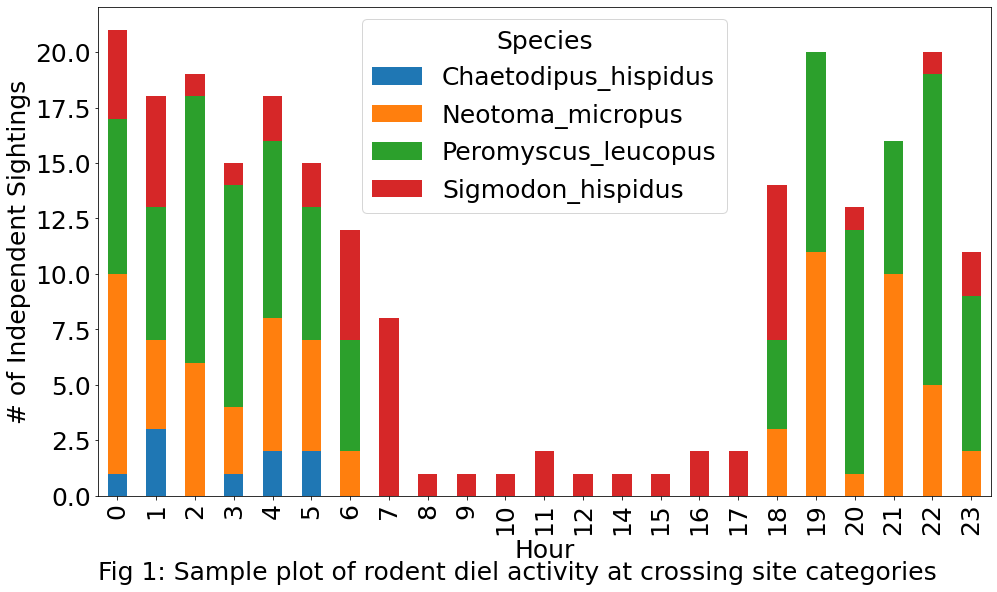

In [130]:
plt.rcParams.update({'font.size': 25})
crossings_time.unstack().plot.bar(ylabel='# of Independent Sightings', stacked=True, figsize=(16,9))
plt.annotate('Fig 1: Sample plot of rodent diel activity at crossing site categories', (0,0), (0, -65), xycoords='axes fraction', textcoords='offset points', va='top')

In [60]:
guards=rodents[rodents['Camera'].isin(['WG03','WG04','WG05','WG06','WG07','WG14','WG17'])]

In [61]:
guards_time = guards.groupby(['Hour','Species'])['# of Individuals'].sum()

Text(0, -50, 'Fig 1: Sample plot of rodent diel activity at guard site categories')

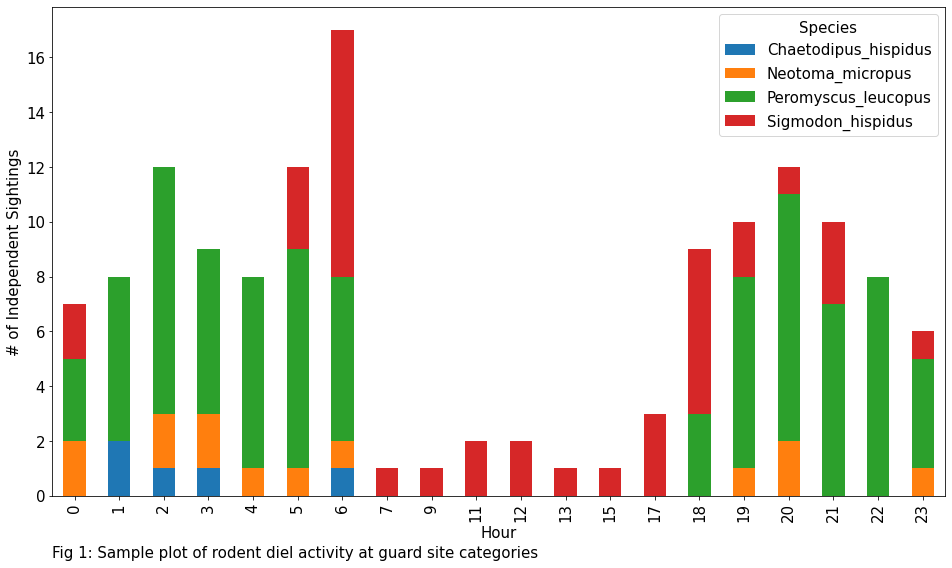

In [76]:
plt.rcParams.update({'font.size': 15})
guards_time.unstack().plot.bar(ylabel='# of Independent Sightings', stacked=True, figsize=(16,9))
plt.annotate('Fig 1: Sample plot of rodent diel activity at guard site categories', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top')

In [72]:
ref=rodents[rodents['Camera'].isin(['DC01','DC02', 'DC03', 'FC01', 'FC02', 'OC01', 'OC02', 'OC03'])]

In [74]:
ref_time = ref.groupby(['Hour','Species'])['# of Individuals'].sum()

Text(0, -65, 'Fig 2: Sample plot of rodent diel activity at reference site categories')

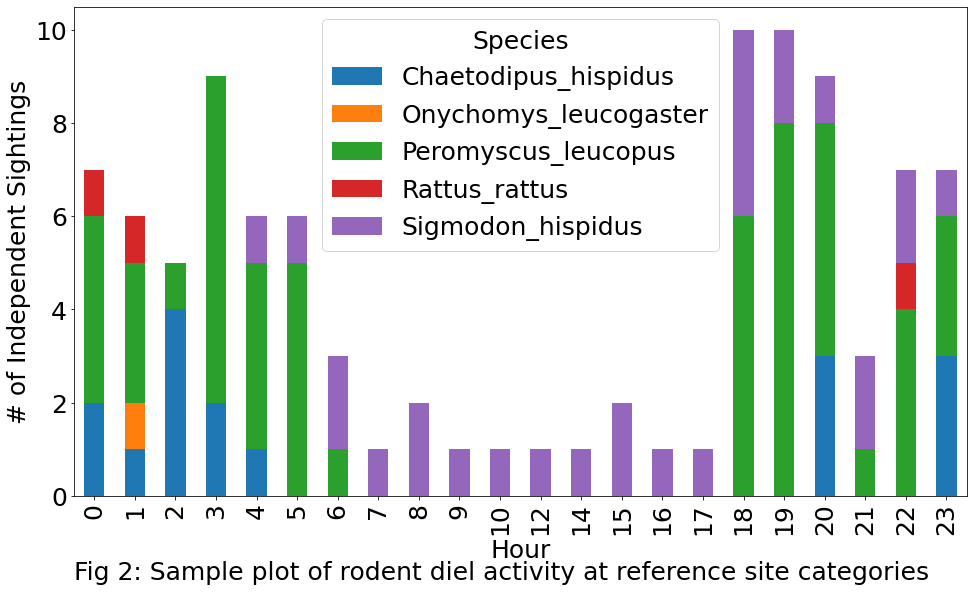

In [131]:
plt.rcParams.update({'font.size': 25})
ref_time.unstack().plot.bar(ylabel='# of Independent Sightings', stacked=True, figsize=(16,9))
plt.annotate('Fig 2: Sample plot of rodent diel activity at reference site categories', (0,0), (0, -65), xycoords='axes fraction', textcoords='offset points', va='top')

In [65]:
pred_data = pd.read_csv('Crossing_Events_Final_Project.csv')

In [69]:
pred_time = pred_data.groupby(['Hour','Species'])['#.of.Indivs.'].sum()

Text(0, -65, 'Fig 3: Sample plot of rodent predator diel activity at guard and crossing site categories')

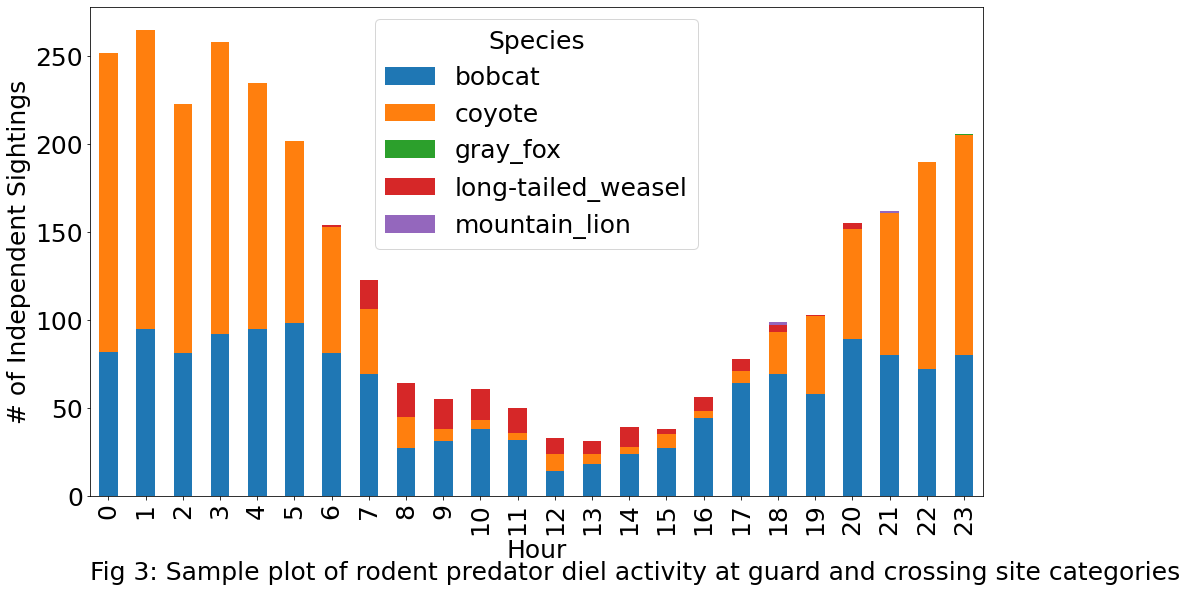

In [132]:
plt.rcParams.update({'font.size': 25})
pred_time.unstack().plot.bar(ylabel='# of Independent Sightings', stacked=True, figsize=(16,9))
plt.annotate('Fig 3: Sample plot of rodent predator diel activity at guard and crossing site categories', (0,0), (0, -65), xycoords='axes fraction', textcoords='offset points', va='top')

In [83]:
pred_prey = pd.read_csv('Pred_Prey.csv')
pred_prey

,Site,bobcat,coyote,long-tailed_weasel,Chaetodipus_hispidus,Neotoma_micropus,Onychomys_leucogaster,Peromyscus_leucopus,Rattus_rattus,Reithrodontomys_fulvescen,Sigmodon_hispidus,Rodent
0,WCS2,101.0,117,1.0,9.0,NaN,NaN,32.0,NaN,1.0,19.0,61
1,WCS3A,459.0,109,8.0,NaN,21.0,NaN,81.0,NaN,NaN,11.0,113
2,WCS4,14.0,43,26.0,NaN,46.0,NaN,2.0,NaN,NaN,21.0,69
3,WG03,29.0,74,1.0,NaN,2.0,NaN,9.0,NaN,NaN,27.0,38
4,WG04,23.0,136,16.0,NaN,NaN,NaN,17.0,NaN,NaN,11.0,28
5,WG05,40.0,80,3.0,NaN,11.0,NaN,22.0,NaN,NaN,NaN,33
6,WG06,2.0,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,WG07,10.0,45,1.0,5.0,NaN,NaN,35.0,NaN,NaN,NaN,40
8,WG14,NaN,57,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,WG17,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [84]:
pred_prey=pred_prey.fillna(0)

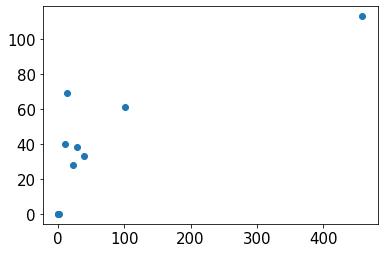

In [85]:
plt.scatter(pred_prey['bobcat'],pred_prey['Rodent'])

In [138]:
slope, intercept, r_value, p_value, std_err = stats.linregress(pred_prey['bobcat'],pred_prey['Rodent'])

In [139]:
r_value

0.805017494514184

In [140]:
p_value

0.004960825138180367

Text(0, -50, 'Fig 4: R value = .805, P value = .0049')

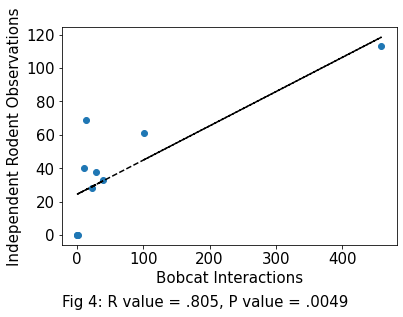

In [146]:
plt.rcParams.update({'font.size': 15})
plt.plot(pred_prey['bobcat'], slope*pred_prey['bobcat']+intercept, 'k--')
plt.scatter(pred_prey['bobcat'],pred_prey['Rodent'])
plt.xlabel('Bobcat Interactions')
plt.ylabel('Independent Rodent Observations')
plt.annotate('Fig 4: R value = .805, P value = .0049', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top')

In [94]:
r_value

0.4319984072237262

In [95]:
p_value

0.21249126357296386

Text(0, -50, 'Fig 5: R value = .432, P value = .2125')

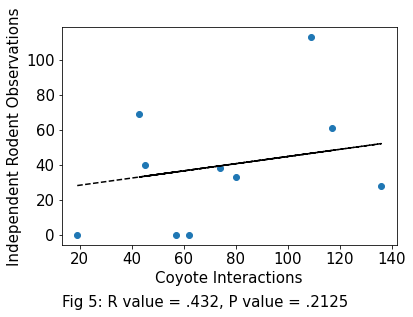

In [147]:
plt.plot(pred_prey['coyote'], slope*pred_prey['coyote']+intercept, 'k--')
plt.scatter(pred_prey['coyote'],pred_prey['Rodent'])
plt.xlabel('Coyote Interactions')
plt.ylabel('Independent Rodent Observations')
plt.annotate('Fig 5: R value = .432, P value = .2125', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top')

In [111]:
rab = pd.read_csv('coy_rab.csv')

In [112]:
rab=rab.fillna(0)

In [157]:
slope, intercept, r_value, p_value, std_err = stats.linregress(rab['bobcat'],rab['eastern_cottontail'])

In [155]:
r_value

0.003175411486250017

In [156]:
p_value

0.9879809662152063

Text(0, -50, 'Fig 5: R value = .0032, P value = .988')

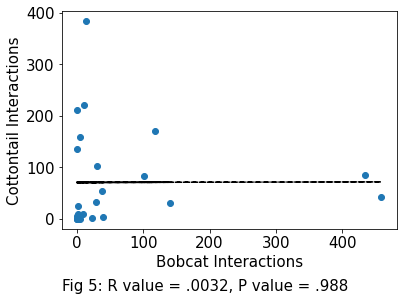

In [158]:
plt.plot(rab['bobcat'], slope*rab['bobcat']+intercept, 'k--')
plt.scatter(rab['bobcat'],rab['eastern_cottontail'])
plt.xlabel('Bobcat Interactions')
plt.ylabel('Cottontail Interactions')
plt.annotate('Fig 5: R value = .0032, P value = .988', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top')

In [159]:
slope, intercept, r_value, p_value, std_err = stats.linregress(rab['coyote'],rab['eastern_cottontail'])

In [150]:
r_value

-0.2531954277948496

In [151]:
p_value

0.2220163493342686

Text(0, -50, 'Fig 5: R value = -.253, P value = .222')

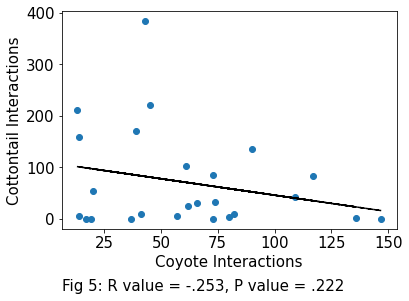

In [160]:
plt.plot(rab['coyote'], slope*rab['coyote']+intercept, 'k--')
plt.scatter(rab['coyote'],rab['eastern_cottontail'])
plt.xlabel('Coyote Interactions')
plt.ylabel('Cottontail Interactions')
plt.annotate('Fig 5: R value = -.253, P value = .222', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top')

In [24]:
data['date']=pd.to_datetime(data[['Year', 'Month', 'Day','Hour','Minute', 'Second']])

In [28]:
rodents1 = data[data['Species'].isin(['Chaetodipus_hispidus','Sigmodon_hispidus','Peromyscus_leucopus','Onychomys_leucogaster', 'Rattus_rattus', 'Neotoma_micropus','Reithrodontomys_fulvous'])]

In [37]:
rodents1=rodents1[['Species','date']]

In [39]:
rodents1.to_csv('rodent_dates.csv')